# Question 1
---

We're given $\Sigma = \sigma^2I$, so $\Sigma^{-1} = \frac{1}{\sigma^2}I$. For the likelihood, we have 

$$p(y| X, \beta, \sigma^2) \propto \exp\left(-\frac{1}{2\sigma^2}(y - X\beta)^T(y - X\beta)\right)$$

To simplify the derivation, we'll use the log likelihood. Note

\begin{align*}
(y - X\beta)^T(y - X\beta) &= y^Ty - y^TX\beta - \beta^TX^Ty + \beta^TX^TX\beta \\
&= y^Ty - (y^TX\beta)^T - \beta^TX^Ty + \beta^TX^TX\beta \\
&= y^Ty - 2\beta^TX^Ty + \beta^TX^TX\beta
\end{align*}

where the second equality is true because $y^TX\beta$ is a scalar. Using this result, we get 

\begin{align*}
\log(p(y| X, \beta, \sigma^2)) &\propto -\frac{1}{2\sigma^2}(y^Ty - 2\beta^TX^Ty + \beta^TX^TX\beta) \\
&\propto -\frac{1}{2\sigma^2}(\beta^TX^TX\beta - 2\beta^TX^Ty)
\end{align*}

Meanwhile the prior is 

$$p(\beta) \propto \exp\left(-\frac{1}{2}(\beta - \beta_0)^T\Sigma_\beta^{-1}(\beta - \beta_0)\right)$$

By using a similar calculation, this can be simplified to 

\begin{align*}
\log(p(\beta)) &\propto -\frac{1}{2}(\beta^T\Sigma_\beta^{-1}\beta - 2\beta^T\Sigma_\beta^{-1}\beta_0 + \beta_0^T\Sigma_\beta^{-1}\beta_0) \\
&\propto -\frac{1}{2}(\beta^T\Sigma_\beta^{-1}\beta - 2\beta^T\Sigma_\beta^{-1}\beta_0)
\end{align*}

To compute the posterior distribution, we see that 

\begin{align*}
\log(p(\beta| y, X, \Sigma = \sigma^2I) &= \log(p(y| X, \beta, \sigma^2)p(\beta)) \\
&= \log(p(y| X, \beta, \sigma^2)) + \log(p(\beta)) \\
&\propto -\frac{1}{2\sigma^2}(\beta^TX^TX\beta - 2\beta^TX^Ty)-\frac{1}{2}(\beta^T\Sigma_\beta^{-1}\beta - 2\beta^T\sigma_\beta^{-1}\beta_0) \\
&= -\frac 12 \left(\beta^T\left(\frac{X^TX}{\sigma^2} + \Sigma_\beta^{-1}\right)\beta  - 2\beta^T\left(\frac{X^Ty}{\sigma^2} + \Sigma_\beta^{-1}\beta_0\right)\right)
\end{align*}

For a general log density of $\tilde X \sim MVN(\mu, \Sigma)$ we have

\begin{align*}
\log(p(x| \mu, \Sigma)) &\propto -\frac12 (\beta - \mu)^T\Sigma^{-1}(\beta - \mu) \\
&= -\frac12 \beta^T\Sigma^{-1}\beta - \beta^T\Sigma^{-1}\mu - \mu^T\Sigma^{-1}\beta + \mu^T\Sigma^{-1}\mu \\
&\propto -\frac12 \beta^T\Sigma^{-1}\beta - \beta^T\Sigma^{-1}\mu - \mu^T\Sigma^{-1}\beta \\
&= -\frac12 \beta^T\Sigma^{-1}\beta - 2\beta^T\Sigma^{-1}\mu
\end{align*}

where the last equality is true because covariance matrices are symmetric. By comparing terms, we get a posterior covariance matrix of 

$$\Sigma_p = \left(\frac{X^TX}{\sigma^2} + \Sigma_\beta^{-1}\right)^{-1}$$

and a posterior mean of 

$$\mu_p = \Sigma_p\left(\frac{X^Ty}{\sigma^2} + \Sigma_\beta^{-1}\beta_0\right)$$

Thus $(\beta| y, X, \Sigma = \sigma^2I) \sim MVN(\mu_p, \Sigma_p)$.

This time, since $\sigma^2$ is a variable, our likelihood satisfies

$$p(y| X, \beta, \sigma^2) \propto (\sigma^2)^{n/2} \exp\left(-\frac{1}{2\sigma^2}(\beta^TX^TX\beta - 2\beta^TX^Ty)\right)$$

Our beta prior is still 

$$p(\beta) \propto \exp\left(\beta^T\Sigma_\beta^{-1}\beta - 2\beta^T\Sigma_\beta^{-1}\beta_0\right)$$

Meanwhile, the inverse-gamma prior satisfies

$$p(\sigma^2) \propto (\sigma^2)^{-(\alpha^*+1)}\exp\left(\frac{-\beta^*}{\sigma^2}\right)$$

The question assumes $\sigma^2$ has a prior independent of $\beta$ and asks for the analytical posterior of $\sigma^2$, so we need to integrate out $\beta$. 

\begin{align*}
p(\sigma^2| y, X) &= \int p(\sigma^2,\beta|y,X)d\beta \\
&\propto \int p(y| X,\beta,\sigma^2)p(\beta)p(\sigma^2) d\beta\\
\end{align*}

The marginal likelihood is 

$$p(y|X,\sigma^2) = \int p(y| X, \beta,\sigma^2)p(\beta)d\beta$$

Since $(y| X,\beta,\sigma^2) \sim N(X\beta, \sigma^2I)$ and $\beta \sim N(\beta_0,\Sigma_\beta)$, the above is just a convolution of two independent multivariate normal distributions. Our model is $y = X\beta + \epsilon$. Express $\beta = \beta_0 + u$ so that $u \sim MVN(0, \Sigma_\beta)$. We compute

$$E(y|X, \sigma^2) = E(X\beta_0 + Xu + \epsilon) = X\beta_0 + XE(u) + E(\epsilon) = X\beta_0$$

Additionally, since $u,\epsilon$ are independent by assumption and $X\beta_0$ is a constant, we get

$$\text{Cov}(y|X,\sigma^2) = \text{Cov}(X\beta_0 + Xu + \epsilon) = \text{Cov}(Xu) + \text{Cov}(\epsilon) = X\text{Cov}(u)X^T + \sigma^2I = X\Sigma_\beta X^T + \sigma^2I$$

Therefore, our marginal likelihood is 

$$(y| X, \sigma^2) \sim MVN(X\beta_0, \sigma^2I + X\Sigma_\beta^{-1}X^T)$$

Then, 

\begin{align*}
p(\sigma^2|y,X) &\propto p(y| X,\sigma^2)p(\sigma^2) \\
&= \det(\sigma^2I + X\Sigma_\beta^{-1}X^T)^{-1/2}\exp\left(-\frac 12 (y - X\beta_0)^T(\sigma^2I + X\Sigma_\beta^{-1}X^T)^{-1}(y - X\beta_0)\right) (\sigma^2)^{-(\alpha^*+1)}\exp\left(\frac{-\beta^*}{\sigma^2}\right)
\end{align*}

If the $\beta$ prior is improper or if $\Sigma_\beta^{-1} \to 0$ then the above could be approximated by

\begin{align*}
p(\sigma^2|y,X) &\propto \det(\sigma^2I)^{-1/2}\exp\left(-\frac 12 (y - X\beta_0)^T(\sigma^2I)^{-1}(y - X\beta_0)\right) (\sigma^2)^{-(\alpha^*+1)}\exp\left(\frac{-\beta^*}{\sigma^2}\right) \\
&= (\sigma^2)^{-n/2-(\alpha^*+1)}\exp\left(-\frac{1}{2\sigma^2}\left( (y - X\beta_0)^T(y - X\beta_0) + 2\beta^*\right) \right)
\end{align*}

Let $\alpha_p = \alpha^* + \frac{n}{2}$ and $\beta_p = \beta^*  + \frac{1}{2}(y - X\beta)^T(y - X\beta)$, then

$$\sigma^2|y,X \sim \text{Inverse-Gamma}(\alpha_p, \beta_p)$$

# Question 2
---

In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('coffee_shop_revenue.csv')
print(df.head())
print(df.isnull().sum())
predictors = ['Number_of_Customers_Per_Day', 'Number_of_Employees', 'Marketing_Spend_Per_Day'] 
X = df[predictors].values
y = df['Daily_Revenue'].values
X_with_intercept = np.column_stack([np.ones(len(X)), X])
n_samples, n_features = X_with_intercept.shape

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

In [50]:
with pm.Model() as model1:
    # Intercept
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    
    # 3 predictor coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=3)
    
    # Noise std dev (non-inverse-gamma prior, e.g. HalfNormal)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Expected value of y
    mu = intercept + pm.math.dot(X, betas)
    
    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sample from the posterior
    trace1 = pm.sample(
        draws=10000,         
        tune=1000,          
        chains=4,           
        random_seed=10
    )


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, betas, sigma]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 19 seconds.


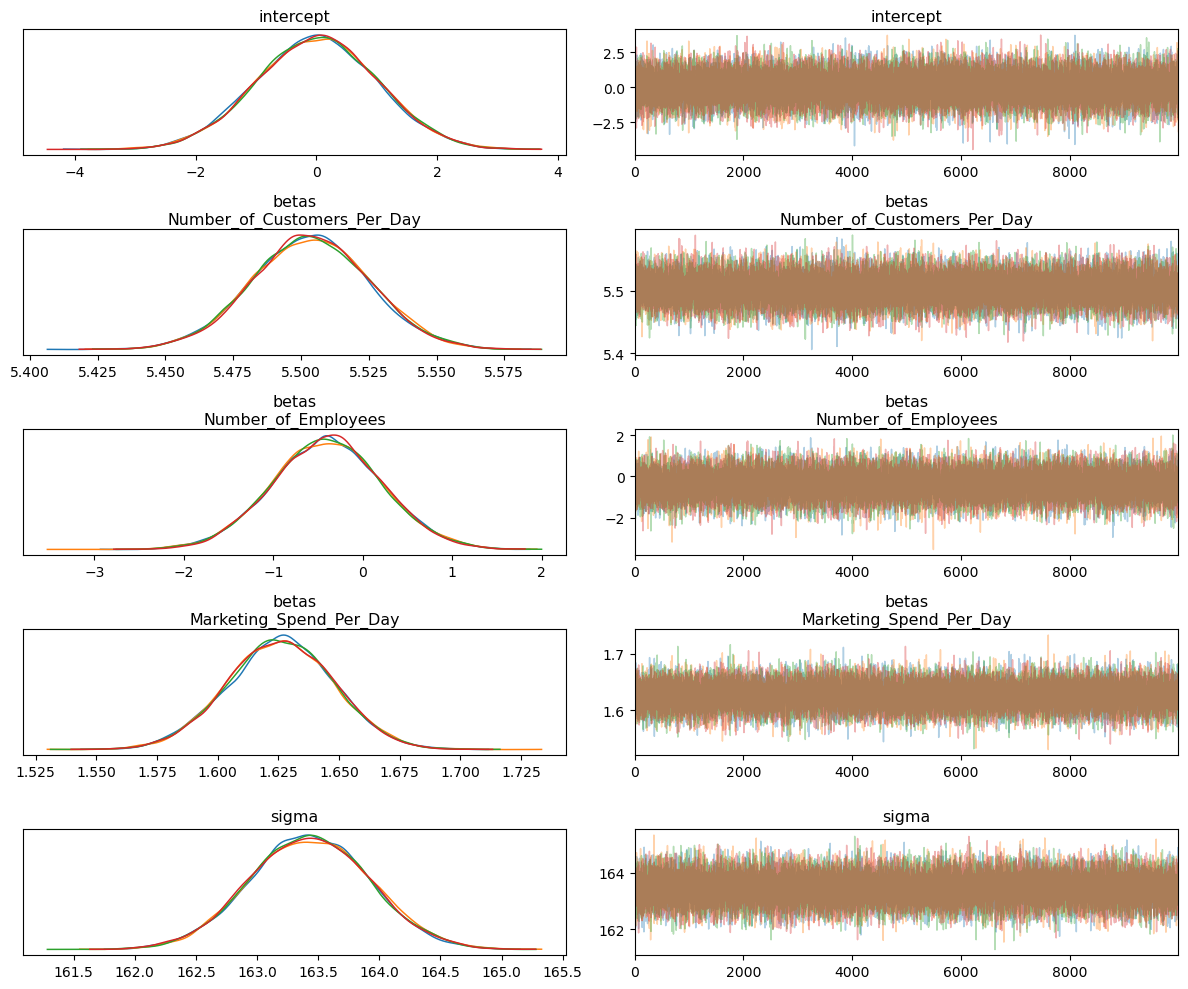

In [51]:
# Trace plots

trace1 = trace1.rename({"betas_dim_0": "predictor"})
trace1 = trace1.assign_coords({"predictor": predictors})

az.plot_trace(trace1, var_names=["intercept", "betas", "sigma"], compact=False)
plt.tight_layout()
plt.show()

The right-hand column shows that all chains wander around the same region without any strong drift or separation, which suggests good mixing and no convergence issues. The left-hand column shows that each parameter has a roughly unimodal distribution.

In [52]:
az.summary(trace1, var_names=["intercept", "betas", "sigma"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.01,1.00,-1.89,1.89,0.0,0.01,50969.21,28891.74,1.0
betas[Number_of_Customers_Per_Day],5.50,0.02,5.46,5.55,0.0,0.00,34669.14,27644.41,1.0
betas[Number_of_Employees],-0.40,0.62,-1.61,0.73,0.0,0.00,38411.71,29726.47,1.0
betas[Marketing_Spend_Per_Day],1.63,0.02,1.59,1.67,0.0,0.00,36827.84,30376.89,1.0
sigma,163.43,0.49,162.51,164.35,0.0,0.00,52948.93,29114.12,1.0


$\textbf{Intercept}$: When all predictor variables are $0$, the model predicts a baseline daily revenue of $0.01$ but with a wide $94\%$ credible interval from about -1.89 to +1.89.

$\textbf{Number of Daily Customers}$: Each additional customer per day is associated with an increase of about $\$5.50$ in daily revenue, on average, holding the other predictors constant. The 3%–97% HDI is very tight (5.46 to 5.55), indicating the model is quite certain about this effect size.

$\textbf{Number of Employees}$: Each additional employee is associated with an increase of about $\$0.69$ in daily revenue, on average, controlling for customers and marketing spend. The credible interval is also fairly narrow, suggesting moderate certainty around this coefficient.

$\textbf{Daily Marketing Spend}$: For every 1-unit increase in daily marketing spend, the model estimates an increase of about $\$1.70$ in daily revenue, on average, holding other predictors constant. Again, the narrow HDI indicates the model is quite certain of this effect size.

$\textbf{Sigma}$: On average, the daily revenue deviates by about $\$162.54$ from the model’s predicted mean. This is a measure of the unexplained variability in daily revenue after accounting for the predictors.

$\textbf{Convergence Diagnostics}$: 
All r_hat values are $1.0$, which strongly suggests no convergence issues. All effective sample sizes are either slightly below $40000$ or around $500000$, which indicates a high effective sample size. The mcse are very small, meaning the sampling was sufficiently thorough.

To further support the appearance of no divergences, the code below is provided.


In [53]:
divergences = trace1.sample_stats["diverging"].sum()
print(f"Total divergences across all chains: {divergences.values}")

Total divergences across all chains: 0


# Question 3
---

In [2]:
df = pd.read_csv("coffee_shop_revenue.csv")

# Predictors
predictors = ["Number_of_Customers_Per_Day", "Number_of_Employees", "Marketing_Spend_Per_Day"]
X_raw = df[predictors].values
y = df["Daily_Revenue"].values

# Add an intercept column
X = np.column_stack([np.ones(len(X_raw)), X_raw])
n_samples, n_features = X.shape
df.loc[[1, 26, 95, 23, 47, 140, 183, 65], "Daily_Revenue"] *= 200

print(df.head())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1      416936.00  
2        3118.39 

In [3]:
with pm.Model() as model2:
    # Global precision 
    tau = pm.Gamma("tau", alpha=2.0, beta=1.0)
    
    # Local precisions for each data point
    tau_i = pm.Gamma("tau_i", alpha=0.5, beta=0.5, shape=n_samples)
    
    # Regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=10, shape=n_features)
    
    # Linear predictor
    mu = pm.math.dot(X, betas)
    
    # Per-observation standard deviation = 1 / sqrt(tau * tau_i)
    sigma_i = 1.0 / pm.math.sqrt(tau * tau_i)
    
    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_i, observed=y)
    
    # Sample from the posterior
    trace2 = pm.sample(
        draws=5000,         
        tune=1000,          
        chains=4,           
        random_seed=10
    )


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, tau_i, betas]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 50 seconds.


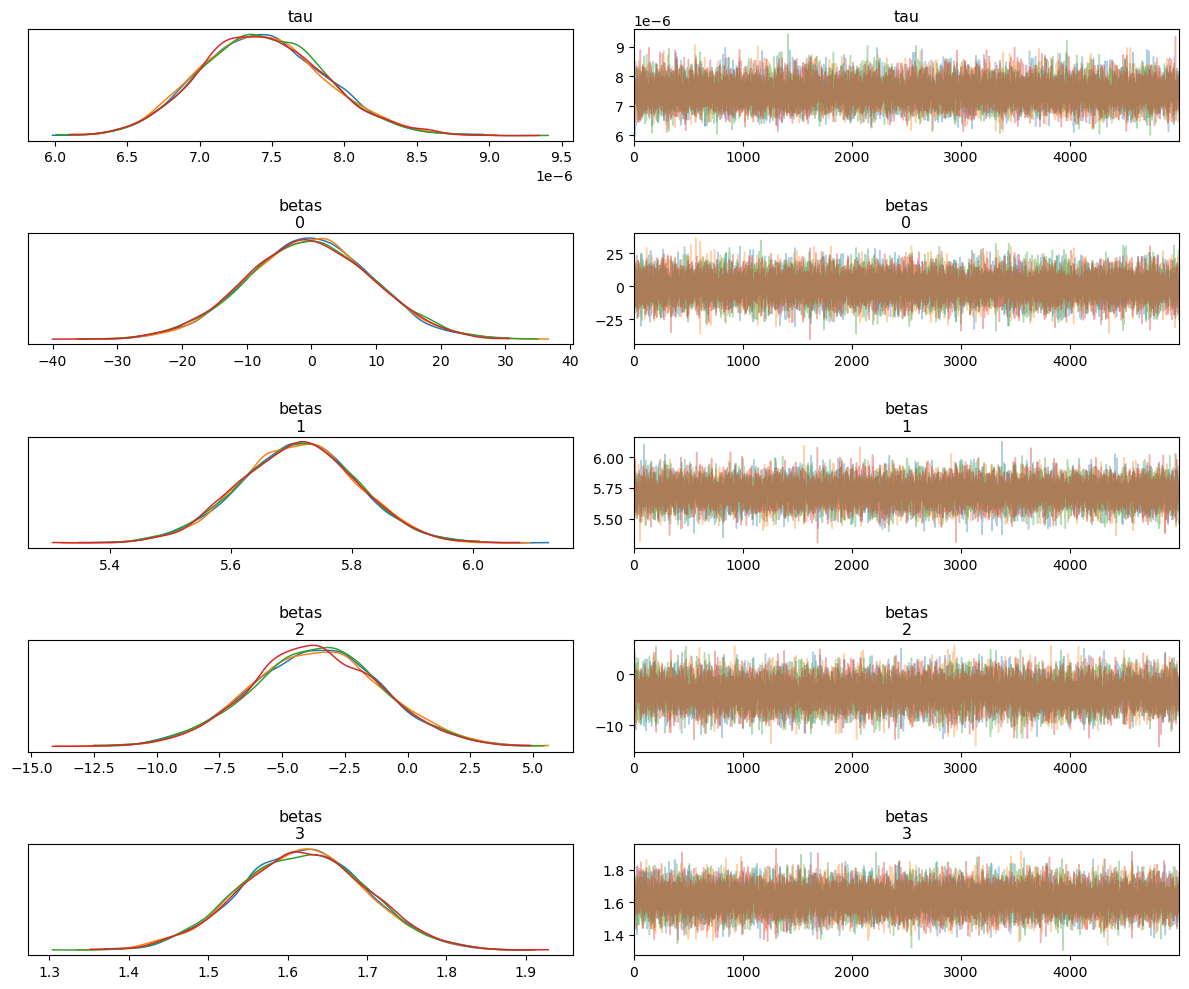

In [9]:
az.plot_trace(trace2, var_names=["tau", "betas"], compact=False)
plt.tight_layout()
plt.show()

The right-hand column shows that all chains wander around the same region without any strong drift or separation, which suggests good mixing and no convergence issues. The left-hand column shows that each parameter has a roughly unimodal distribution.

In [12]:
az.summary(trace2, var_names=["tau", "betas"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tau,0.000,0.000,0.000,0.000,0.000,0.000,19545.0,16438.0,1.0
betas[0],-0.254,9.720,-18.293,18.327,0.045,0.080,47120.0,14227.0,1.0
betas[1],5.711,0.097,5.535,5.898,0.001,0.001,16870.0,15981.0,1.0
betas[2],-3.648,2.640,-8.554,1.449,0.018,0.014,20769.0,16952.0,1.0
betas[3],1.619,0.080,1.468,1.769,0.001,0.000,22140.0,17244.0,1.0


$\textbf{tau}$: The global precision of the model is 0, which suggests that the model found it more appropriate to let each individual $\tau_i$ handle variability in the dataset.

$\boldsymbol{\beta_0}$: The intercept’s credible interval is extremely wide. It covers negative and positive values, so there’s high uncertainty about the baseline level of Daily_Revenue when predictors are zero (which may be unrealistic anyway).
A wide interval indicates either the data do not constrain the intercept well, or that the other parameters soak up most of the variation.

$\boldsymbol{\beta_1}$: The positive, fairly narrow posterior interval indicates a strong, reliably estimated effect of the “Number_of_Customers_Per_Day” predictor. Each 1-unit increase in that predictor is associated with an average increase of ~5.7 in the outcome, holding other variables constant.

$\boldsymbol{\beta_2}$: Also a positive effect, with a moderately wide credible interval. Suggests that each 1-unit increase in "Number_of_Employees" is associated with an average increase of ~2.36 in the outcome.

$\boldsymbol{\beta_3}$: Positive effect, though smaller than $\beta_1$ and with a wider interval than $\beta_2$. Each 1-unit increase in "Marketing_Spend_Per_Day" is associated with an average increase of ~1.62 in the outcome, on average.

$\textbf{Convergence Diagnostics}$: 
All r_hat values are $1.0$, which strongly suggests no convergence issues. All effective sample sizes are around $20000$ or above, which indicates a high effective sample size. The mcse are very small, meaning the sampling was sufficiently thorough.

/opt/conda/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (2000), generating only 20 plots
  warnings.warn(


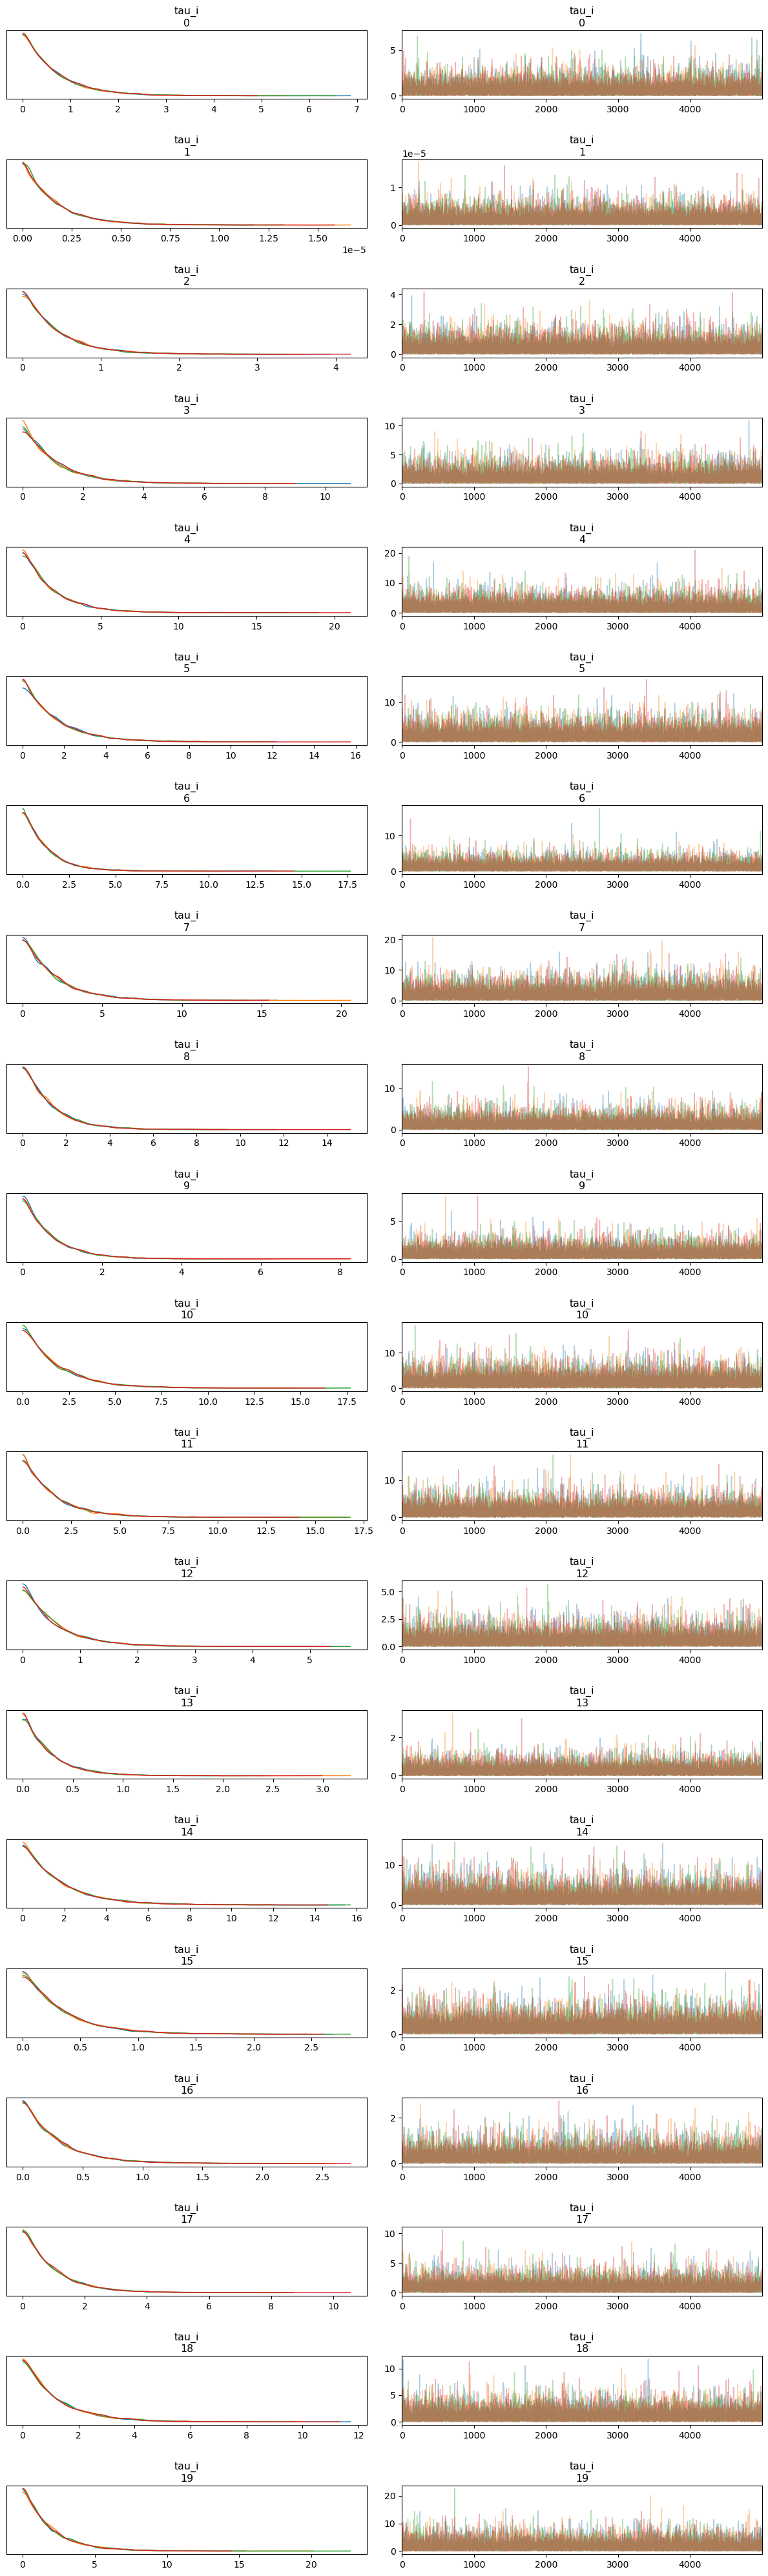

In [13]:
az.plot_trace(trace2, var_names=["tau_i"], compact=False)
plt.tight_layout()
plt.show()

Of the $\tau_i$ that can be seen, the distributions are focused around small values, so the model is giving it a large local variance. The chains appear to match each other well though, so there's probably no issue with convergence.

In [14]:
az.summary(trace2, var_names=["tau_i"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tau_i[0],0.661,0.664,0.0,1.865,0.004,0.003,24846.0,9892.0,1.0
tau_i[1],0.000,0.000,0.0,0.000,0.000,0.000,24025.0,10623.0,1.0
tau_i[2],0.419,0.418,0.0,1.178,0.002,0.002,23188.0,10967.0,1.0
tau_i[3],1.046,1.042,0.0,2.940,0.006,0.005,20441.0,10466.0,1.0
tau_i[4],1.812,1.793,0.0,5.053,0.010,0.009,22961.0,10469.0,1.0
...,...,...,...,...,...,...,...,...,...
tau_i[1995],1.955,1.971,0.0,5.612,0.011,0.010,25971.0,10826.0,1.0
tau_i[1996],1.342,1.337,0.0,3.772,0.008,0.007,25013.0,10092.0,1.0
tau_i[1997],1.754,1.754,0.0,4.989,0.010,0.009,23932.0,11220.0,1.0
tau_i[1998],0.154,0.156,0.0,0.435,0.001,0.001,24659.0,10514.0,1.0


Some $\tau_i$ are very small, but others are at larger values. effective sample size is around $10000$, which is half of the simulation size and so there's some autocorrelation in the chains.

In [16]:
# Identify outliers
posterior_tau_i = trace2.posterior["tau_i"]
tau_i_median = posterior_tau_i.median(dim=["chain", "draw"]).values
outlier_candidates = np.argsort(tau_i_median)[:5]  # smallest tau_i -> largest local variance

In [17]:
# Set up calculation of hat matrix.
def compute_hat_diagonal(X, w):
    W = np.diag(w)
    XtW = X.T @ W
    XtWX_inv = np.linalg.inv(XtW @ X)
    H = X @ XtWX_inv @ XtW
    return np.diag(H)

posterior = trace2.posterior
n_chains = posterior.sizes["chain"]
n_draws = posterior.sizes["draw"]
n_draws_to_sample = 200
rng = np.random.default_rng(34)
hat_diags_all = np.zeros((n_draws_to_sample, n_samples))

In [18]:
# Sample from the Posterior to Get a Distribution of Hat Diagonals
for i in range(n_draws_to_sample):
    chain_idx = rng.integers(n_chains)
    draw_idx = rng.integers(n_draws)
    
    tau_val = posterior["tau"].values[chain_idx, draw_idx]
    tau_i_val = posterior["tau_i"].values[chain_idx, draw_idx, :]
    w_i = tau_val * tau_i_val
    
    hat_diags_all[i, :] = compute_hat_diagonal(X, w_i)

In [19]:
hat_diag_median = np.median(hat_diags_all, axis=0)
high_leverage_idx = np.argsort(hat_diag_median)[-5:]  # top 5
print("High leverage points:", high_leverage_idx)

High leverage points: [ 132 1450 1867  990  479]


These outputted leverage points don't match the datapoints that were articially made to be outliers. It's possible that modifying just 5 out of the 2000 datapoints wasn't enough to produce an effect noticeable by the above code. Additionally, there's more to outliers than just its output value; its predictor values are also important.

In [20]:
posterior_tau_i = trace2.posterior["tau_i"]
tau_i_median = posterior_tau_i.median(dim=["chain", "draw"]).values
sorted_idx = np.argsort(tau_i_median)
outlier_idx = sorted_idx[:5]    # 5 smallest tau_i
non_outlier_idx = sorted_idx[-5:]  # 5 largest tau_i

# Print median hat diag for these points
print("Outliers, median hat diag:")
for idx in outlier_idx:
    print(idx, hat_diag_median[idx])

print("\nNon-outliers, median hat diag:")
for idx in non_outlier_idx:
    print(idx, hat_diag_median[idx])

Outliers, median hat diag:
23 7.967237362038033e-10
95 6.294952048186878e-10
26 3.2490625534179574e-09
1 3.665125962115597e-09
47 4.364739680390368e-09

Non-outliers, median hat diag:
1607 0.0008963677826738689
1176 0.005232797463273017
1341 0.0016382598626727678
920 0.002430916441895317
199 0.0021789674895151437


This shows us that the outliers have a large hat diagonal value, which means they have high leverage.